In [4]:
#questao 1
import numpy as np

# Definindo a matriz A
A = np.array([
    [-3.933, 0.107, 0.126, 0, -9.99],
    [0, -0.987, 0, -22.95, 0],
    [0.002, 0, -0.235, 0, 5.67],
    [0, 1.0, 0, -1.0, 0],
    [0, 0, -1.0, 0, -0.196]
])

# Definindo a função g(x)
def g(x):
    x1, x2, x3, x4, x5 = x
    return np.array([
        -0.727*x2*x3 + 8.39*x3*x4 - 684.4*x4*x5 + 63.5*x4*x2 + 0.2,
        0.949*x1*x3 + 0.173*x1*x5 + 0.35,
        -0.716*x1*x2 - 1.578*x1*x4 + 1.132*x4*x2 + 0.6,
        -x1*x5 + 0.7,
        x1*x4 + 1
    ])

# Definindo a função F(x)
def F(x):
    return A @ x + g(x)

# Definindo a Jacobiana J(x)
def J(x):
    x1, x2, x3, x4, x5 = x
    return np.array([
        [-3.933, 0.107 - 0.727*x3 + 63.5*x4, 0.126 - 0.727*x2 + 8.39*x4, 8.39*x3 - 684.4*x5 + 63.5*x2, -684.4*x4 - 9.99],
        [0.949*x3 + 0.173*x5, -0.987, 0.949*x1, 0, 0.173*x1],
        [-0.716*x2 - 1.578*x4, -0.716*x1 + 1.132*x4, 0, -1.578*x1 + 1.132*x2, 5.67],
        [-x5, 1.0, 0, -1.0, -x1],
        [x4, 0, -1.0, x1, -0.196]
    ])

# Condição inicial
x = np.array([0.2, 0.5, 0.85, 0.93, 0.22])

# Critério de parada
tolerance = 1e-6

# Método de Newton-Raphson
def newton_raphson(x, tolerance):
    while np.linalg.norm(F(x)) > tolerance:
        delta_x = np.linalg.solve(J(x), -F(x))
        x = x + delta_x
    return x

# Executando o método
x_sol = newton_raphson(x, tolerance)
print("Solução:", x_sol)


Solução: [ -4.97500107 -10.97244334  60.54818574 -11.95614875  -0.33843318]


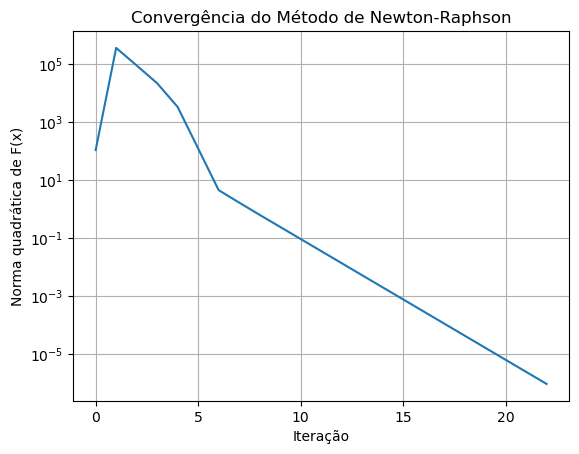

Solução: [ -4.97500106 -10.97244329  60.54818534 -11.95614871  -0.33843318]


In [5]:
#questao 2
import numpy as np
import matplotlib.pyplot as plt

# Definindo a matriz A
A = np.array([
    [-3.933, 0.107, 0.126, 0, -9.99],
    [0, -0.987, 0, -22.95, 0],
    [0.002, 0, -0.235, 0, 5.67],
    [0, 1.0, 0, -1.0, 0],
    [0, 0, -1.0, 0, -0.196]
])

# Definindo a função g(x)
def g(x):
    x1, x2, x3, x4, x5 = x
    return np.array([
        -0.727*x2*x3 + 8.39*x3*x4 - 684.4*x4*x5 + 63.5*x4*x2 + 0.2,
        0.949*x1*x3 + 0.173*x1*x5 + 0.35,
        -0.716*x1*x2 - 1.578*x1*x4 + 1.132*x4*x2 + 0.6,
        -x1*x5 + 0.7,
        x1*x4 + 1
    ])

# Definindo a função F(x)
def F(x):
    return A @ x + g(x)

# Definindo a Jacobiana J(x)
def J(x):
    x1, x2, x3, x4, x5 = x
    return np.array([
        [-3.933, 0.107 - 0.727*x3 + 63.5*x4, 0.126 - 0.727*x2 + 8.39*x4, 8.39*x3 - 684.4*x5 + 63.5*x2, -684.4*x4 - 9.99],
        [0.949*x3 + 0.173*x5, -0.987, 0.949*x1, 0, 0.173*x1],
        [-0.716*x2 - 1.578*x4, -0.716*x1 + 1.132*x4, 0, -1.578*x1 + 1.132*x2, 0],
        [-x5, 1.0, 0, -1.0, -x1],
        [x4, 0, -1.0, x1, -0.196]
    ])

# Condição inicial
x = np.array([0.2, 0.5, 0.85, 0.93, 0.22])

# Critério de parada
tolerance = 1e-6

# Método de Newton-Raphson com armazenamento da norma de F(x)
def newton_raphson(x, tolerance):
    norms = []
    while True:
        norm = np.linalg.norm(F(x))
        norms.append(norm)
        if norm < tolerance:
            break
        delta_x = np.linalg.solve(J(x), -F(x))
        x = x + delta_x
    return x, norms

# Executando o método
x_sol, norms = newton_raphson(x, tolerance)

# Plotando a norma quadrática de F(x)
plt.plot(norms)
plt.yscale('log')  # Escala logarítmica para visualizar melhor a convergência
plt.xlabel('Iteração')
plt.ylabel('Norma quadrática de F(x)')
plt.title('Convergência do Método de Newton-Raphson')
plt.grid(True)
plt.show()

print("Solução:", x_sol)


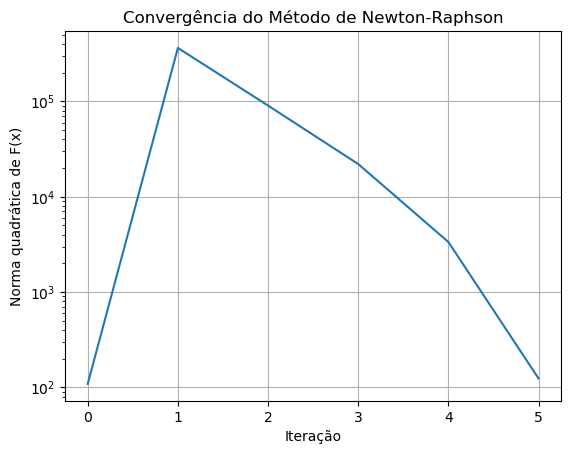

5 primeiros valores de x:
          x1         x2         x3         x4        x5
0   0.200000   0.500000   0.850000   0.930000  0.220000
1 -37.642289 -62.318399 -45.687790 -54.001436  3.541703
2 -20.913218 -39.040051  15.409554 -24.392367  1.944544
3 -10.448845 -17.317210  36.772406 -13.926081  1.101675
4  -5.563861  -8.678086  50.378867 -11.240219  0.202848
Solução final: [ -4.82512038 -10.37264407  57.61493432 -11.65628352  -0.32958897]


In [6]:
#questao 3
import numpy as np
import matplotlib.pyplot as plt

# Definindo a matriz A
A = np.array([
    [-3.933, 0.107, 0.126, 0, -9.99],
    [0, -0.987, 0, -22.95, 0],
    [0.002, 0, -0.235, 0, 5.67],
    [0, 1.0, 0, -1.0, 0],
    [0, 0, -1.0, 0, -0.196]
])

# Definindo a função g(x)
def g(x):
    x1, x2, x3, x4, x5 = x
    return np.array([
        -0.727*x2*x3 + 8.39*x3*x4 - 684.4*x4*x5 + 63.5*x4*x2 + 0.2,
        0.949*x1*x3 + 0.173*x1*x5 + 0.35,
        -0.716*x1*x2 - 1.578*x1*x4 + 1.132*x4*x2 + 0.6,
        -x1*x5 + 0.7,
        x1*x4 + 1
    ])

# Definindo a função F(x)
def F(x):
    return A @ x + g(x)

# Definindo a Jacobiana J(x)
def J(x):
    x1, x2, x3, x4, x5 = x
    return np.array([
        [-3.933, 0.107 - 0.727*x3 + 63.5*x4, 0.126 - 0.727*x2 + 8.39*x4, 8.39*x3 - 684.4*x5 + 63.5*x2, -684.4*x4 - 9.99],
        [0.949*x3 + 0.173*x5, -0.987, 0.949*x1, 0, 0.173*x1],
        [-0.716*x2 - 1.578*x4, -0.716*x1 + 1.132*x4, 0, -1.578*x1 + 1.132*x2, 0],
        [-x5, 1.0, 0, -1.0, -x1],
        [x4, 0, -1.0, x1, -0.196]
    ])

# Condição inicial
x = np.array([0.2, 0.5, 0.85, 0.93, 0.22])

# Critério de parada
tolerance = 1e-6

# Método de Newton-Raphson com armazenamento da norma de F(x) e valores de x
def newton_raphson(x, tolerance):
    norms = []
    x_values = []
    iteration = 0
    while True:
        norm = np.linalg.norm(F(x))
        norms.append(norm)
        x_values.append(x.copy())
        if norm < tolerance or iteration >= 5:
            break
        delta_x = np.linalg.solve(J(x), -F(x))
        x = x + delta_x
        iteration += 1
    return x, norms, x_values

# Executando o método
x_sol, norms, x_values = newton_raphson(x, tolerance)

# Plotando a norma quadrática de F(x)
plt.plot(norms)
plt.yscale('log')  # Escala logarítmica para visualizar melhor a convergência
plt.xlabel('Iteração')
plt.ylabel('Norma quadrática de F(x)')
plt.title('Convergência do Método de Newton-Raphson')
plt.grid(True)
plt.show()

# Imprimindo os 5 primeiros valores de x
import pandas as pd

columns = ['x1', 'x2', 'x3', 'x4', 'x5']
df = pd.DataFrame(x_values, columns=columns)
print("5 primeiros valores de x:")
print(df.head(5))

print("Solução final:", x_sol)
